In [1]:
import DataSet
import NeuralNetwork
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
objDataSet = DataSet.DataSet('DataSet.csv','TrainingSet.hdf5',100,100)
objDataSet.CreateHDF5DataSet()

191 6
Processing: 1 of 191 - 0.52% - Data\apple_1.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 2 of 191 - 1.05% - Data\apple_2.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 3 of 191 - 1.57% - Data\apple_3.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 4 of 191 - 2.09% - Data\apple_4.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 5 of 191 - 2.62% - Data\apple_5.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 6 of 191 - 3.14% - Data\apple_6.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 7 of 191 - 3.66% - Data\apple_7.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 8 of 191 - 4.19% - Data\apple_8.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 9 of 191 - 4.71% - Data\apple_9.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 10 of 191 - 5.24% - Data\apple_10.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 11 of 191 - 5.76% - Data\apple_11.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 12 of 191 - 6.28% - Data\apple_12.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 13 of 191 - 6.81% - Data\apple_13.jpgLabela: [1, 0, 0, 0, 0, 0]
Processing: 14 of 191 - 

In [3]:
objNeuralNetwork = NeuralNetwork.NeuralNetwork(0.0001)
objNeuralNetwork.AddInputLayer(100,100,6)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer1',5,32,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer2',5,16,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer3',5,16,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer4',3,8,2)
#objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer3',5,4,2)
objNeuralNetwork.AddFlattenLayer('FlattenLayer3')

In [4]:
objNeuralNetwork.current_input.get_shape()

TensorShape([Dimension(None), Dimension(128)])

In [5]:
#objNeuralNetwork.AddDenseLayer('DenseLayer1',2048,1024,tf.nn.relu)
#objNeuralNetwork.AddDenseLayer('DenseLayer2',648,512,tf.nn.relu)
#objNeuralNetwork.AddDropOut()
#objNeuralNetwork.AddDenseLayer('DenseLayer3',512,128,tf.nn.relu)
#objNeuralNetwork.AddDropOut()
objNeuralNetwork.AddDenseLayer('DenseLayer4',128,32,tf.nn.relu)
objNeuralNetwork.AddDropOut()
objNeuralNetwork.AddDenseLayer('DenseLayer5',32,6,tf.nn.softmax)
objNeuralNetwork.CrossEntropy()
objNeuralNetwork.Compile('Adam')

In [6]:
batch_size = 100
number_epochs = 2000
for i in range(number_epochs):
    error_g = 0
    for item in objDataSet.GenerateTrainingData(batch_size):
        input_vector = item[0]
        output_vector= item[1]
        
        error = objNeuralNetwork.Train(input_vector,output_vector,0.8)
        error_g += error
        
    error_g = error_g/batch_size
    print("Epoch: {0} - Error: {1}".format(i+1,error_g))

Epoch: 1 - Error: 0.01791789412498474
Epoch: 2 - Error: 0.01791754722595215
Epoch: 3 - Error: 0.017918031215667724
Epoch: 4 - Error: 0.017916737794876098
Epoch: 5 - Error: 0.0179166042804718
Epoch: 6 - Error: 0.017916415929794312
Epoch: 7 - Error: 0.01791715860366821
Epoch: 8 - Error: 0.01791766405105591
Epoch: 9 - Error: 0.017918388843536377
Epoch: 10 - Error: 0.0179172146320343
Epoch: 11 - Error: 0.01791732430458069
Epoch: 12 - Error: 0.01791714668273926
Epoch: 13 - Error: 0.017917529344558716
Epoch: 14 - Error: 0.017917965650558473
Epoch: 15 - Error: 0.01791770935058594
Epoch: 16 - Error: 0.017917661666870116
Epoch: 17 - Error: 0.017917882204055786
Epoch: 18 - Error: 0.017917141914367676
Epoch: 19 - Error: 0.017918301820755003
Epoch: 20 - Error: 0.017917062044143676
Epoch: 21 - Error: 0.017916792631149293
Epoch: 22 - Error: 0.017917071580886842
Epoch: 23 - Error: 0.017917098999023436
Epoch: 24 - Error: 0.017918380498886107
Epoch: 25 - Error: 0.017918118238449098
Epoch: 26 - Error: 0

In [7]:
objNeuralNetwork.SaveModel("tmp/model.ckpt")

Model saved in file: tmp/model.ckpt


In [8]:
objNeuralNetwork.LoadModel("tmp/model.ckpt")

In [9]:
test_input,test_class = objDataSet.GetSample(32)

In [10]:
import numpy as np

In [11]:
test_input = np.array(test_input)

In [12]:
test_input.shape

(100, 100, 3)

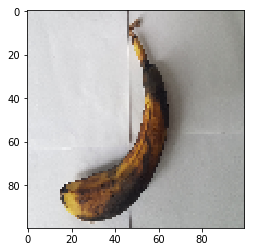

[ 0.  1.  0.  0.  0.  0.]


In [13]:
plt.imshow(test_input)
plt.show()
print(test_class)

In [14]:
image = np.expand_dims(test_input,axis=0)

In [15]:
image.shape, image.min(), image.max()

((1, 100, 100, 3), 0.029333333, 0.96702117)

In [16]:
result = objNeuralNetwork.Predict(image,roundVector=False)

In [17]:
result = objNeuralNetwork.Predict(np.expand_dims(test_input,axis=0),roundVector=False)

In [18]:
result

array([[  2.94230858e-07,   9.99776185e-01,   2.14289226e-08,
          1.87907662e-30,   2.23592549e-04,   1.01661207e-25]], dtype=float32)

In [19]:
maxIndex = np.argmax(result)

In [20]:
maxIndex

1

In [21]:
result = np.rint(result)

In [22]:
result

array([[ 0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)

In [23]:
print(result)

[[ 0.  1.  0.  0.  0.  0.]]
